In [1]:
import pandas as pd

# Cargar el dataset original (asegúrate de tener el archivo "train.csv" en tu carpeta)
train_data = pd.read_csv("train.csv")

# Copia del dataset para limpiar los datos sin modificar el original
train_cleaned = train_data.copy()

# 1. Rellenar con "None" las columnas categóricas donde NaN significa "No aplica"
cols_fill_none = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 
                  "GarageType", "GarageFinish", "GarageQual", "GarageCond", 
                  "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType"]
train_cleaned[cols_fill_none] = train_cleaned[cols_fill_none].fillna("None")

# 2. Rellenar con 0 las columnas numéricas donde NaN significa "No existe"
cols_fill_zero = ["MasVnrArea", "GarageYrBlt"]
train_cleaned[cols_fill_zero] = train_cleaned[cols_fill_zero].fillna(0)

# 3. Imputar LotFrontage con la mediana del vecindario
train_cleaned["LotFrontage"] = train_cleaned.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# 4. Rellenar Electrical con el valor más frecuente (moda)
train_cleaned["Electrical"] = train_cleaned["Electrical"].fillna


In [ ]:
import pandas as pd

# Cargar el dataset original (asegúrate de que train.csv existe en la carpeta actual)
train_data = pd.read_csv("train.csv")

# Copia del dataset para limpiar los datos sin modificar el original
train_cleaned = train_data.copy()

# 1. Rellenar con "None" las columnas categóricas donde NaN significa "No aplica"
cols_fill_none = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 
                  "GarageType", "GarageFinish", "GarageQual", "GarageCond", 
                  "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "MasVnrType"]
train_cleaned[cols_fill_none] = train_cleaned[cols_fill_none].fillna("None")

# 2. Rellenar con 0 las columnas numéricas donde NaN significa "No existe"
cols_fill_zero = ["MasVnrArea", "GarageYrBlt"]
train_cleaned[cols_fill_zero] = train_cleaned[cols_fill_zero].fillna(0)

# 3. Imputar LotFrontage con la mediana del vecindario
train_cleaned["LotFrontage"] = train_cleaned.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# 4. Rellenar Electrical con el valor más frecuente (moda)
train_cleaned["Electrical"] = train_cleaned["Electrical"].fillna(train_cleaned["Electrical"].mode()[0])

# Guardar el dataset limpio para usarlo después
train_cleaned.to_csv("train_cleaned.csv", index=False)

print("Archivo 'train_cleaned.csv' guardado exitosamente.")

✅ Archivo 'train_cleaned.csv' guardado exitosamente.


In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset limpio (debes haber generado antes 'train_cleaned.csv')
train_cleaned = pd.read_csv("train_cleaned.csv")

# Copia del dataset para codificar sin modificar el original
train_encoded = train_cleaned.copy()

# 1. Aplicar Label Encoding a variables ordinales con jerarquía
ordinal_mappings = {
    "Ex": 5, "Gd": 4, "TA": 3, "Fa": 2, "Po": 1, "None": 0
}

ordinal_cols = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", 
                "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]

for col in ordinal_cols:
    train_encoded[col] = train_encoded[col].map(ordinal_mappings)

# 2. Aplicar One-Hot Encoding a las demás variables categóricas
categorical_cols = train_encoded.select_dtypes(include=["object"]).columns

# Aplicar One-Hot Encoding
train_encoded = pd.get_dummies(train_encoded, columns=categorical_cols, drop_first=True)

# Guardar el dataset procesado
train_encoded.to_csv("train_encoded.csv", index=False)

print("Archivo 'train_encoded.csv' guardado exitosamente.")

Archivo 'train_encoded.csv' guardado exitosamente.


In [7]:
import pandas as pd

# Cargar el dataset codificado
train_encoded = pd.read_csv("train_encoded.csv")

# Revisar valores nulos en cada columna
missing_values = train_encoded.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filtrar solo columnas con valores nulos

print("Columnas con valores NaN y su cantidad:\n", missing_values)


Columnas con valores NaN y su cantidad:
 BsmtQual         37
BsmtCond         37
FireplaceQu     690
GarageQual       81
GarageCond       81
PoolQC         1453
dtype: int64


In [17]:
# Opción 1: Eliminar filas con valores nulos
train_encoded.fillna(train_encoded.median(), inplace=True)

# Guardar el dataset limpio nuevamente
train_encoded.to_csv("train_encoded.csv", index=False)

print("Se han eliminado o imputado los valores NaN.")


Se han eliminado o imputado los valores NaN.


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Cargar el dataset procesado (asegúrate de tenerlo en la misma carpeta)
train_encoded = pd.read_csv("train_encoded.csv")

# Separar la variable objetivo (SalePrice) de las variables predictoras
X = train_encoded.drop(columns=["SalePrice"])
y = train_encoded["SalePrice"]

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicar StandardScaler para normalizar las variables numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo corregido
modelo_corregido = LinearRegression()
modelo_corregido.fit(X_train_scaled, y_train)

# Generar predicciones
y_test_pred = modelo_corregido.predict(X_test_scaled)

# Verificar que las variables existen
print("Datos preparados: y_test y y_test_pred están listos.")


Datos preparados: y_test y y_test_pred están listos.


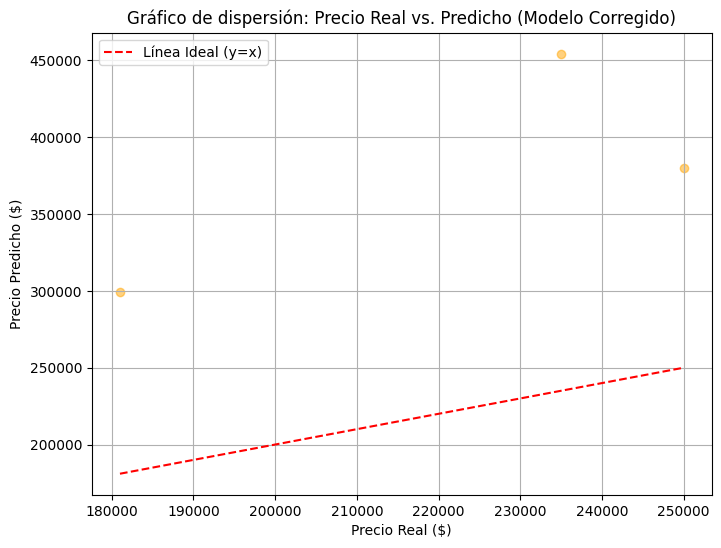

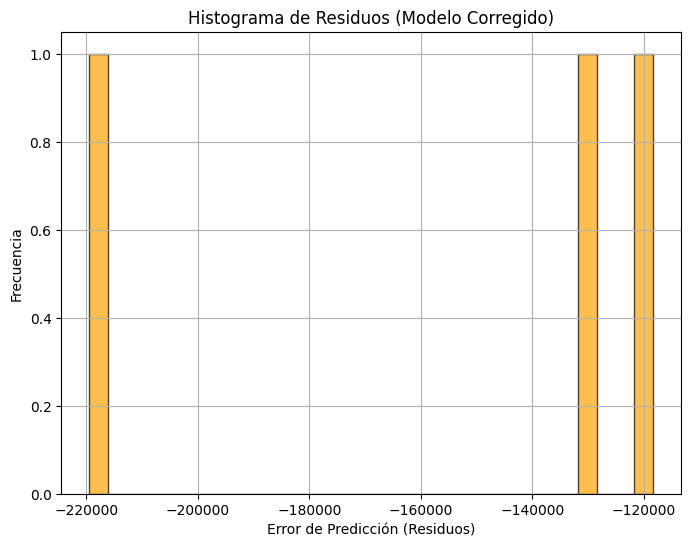

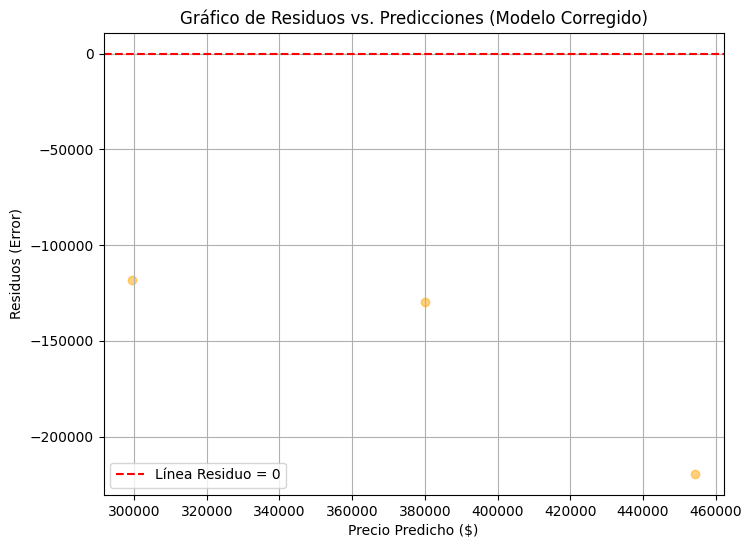

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Supongamos que ya tienes tus datos reales y predichos
# Si aún no tienes y_test_pred, usa las predicciones reales de tu modelo corregido
# y_test_pred = modelo.predict(X_test_scaled)  # Descomenta esta línea si tienes tu modelo entrenado

# Calcular los residuos
residuals = y_test - y_test_pred

# 🔹 1. Gráfico de dispersión: Precio Real vs. Predicho
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color="orange")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--", label="Línea Ideal (y=x)")
plt.xlabel("Precio Real ($)")
plt.ylabel("Precio Predicho ($)")
plt.title("Gráfico de dispersión: Precio Real vs. Predicho (Modelo Corregido)")
plt.legend()
plt.grid(True)
plt.show()

# 🔹 2. Histograma de los residuos
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7, color="orange")
plt.xlabel("Error de Predicción (Residuos)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (Modelo Corregido)")
plt.grid(True)
plt.show()

# 🔹 3. Gráfico de residuos vs. Predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.5, color="orange")
plt.axhline(y=0, color='red', linestyle="--", label="Línea Residuo = 0")
plt.xlabel("Precio Predicho ($)")
plt.ylabel("Residuos (Error)")
plt.title("Gráfico de Residuos vs. Predicciones (Modelo Corregido)")
plt.legend()
plt.grid(True)
plt.show()

In [20]:
print("Tamaño de y_test:", len(y_test))
print("Tamaño de y_test_pred:", len(y_test_pred))

Tamaño de y_test: 3
Tamaño de y_test_pred: 3
